#### load dependencies

In [1]:
import keras
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dropout,Dense,Flatten
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import SpatialDropout1D
from keras.layers import SimpleRNN
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import os
from keras.datasets import imdb
%matplotlib inline

### set hyperparameters

In [2]:
output_dir = "model_output/RNN/"

epochs = 16
batch_size = 128

#embedding layer:
n_dims = 64
max_review_length = 100
# skip top 50 words to skip common words(stopwords are not removed so have to do this)
n_words_to_skip = 50
n_unique_words = 10000
#while padding if the review is < 100 words pad it at the beginning of the review.
#while truncating if the review is > 100 cut the review at the beginning
pad_type = trunc_type = "pre"
dropout_embed = 0.2
#conv layer:
n_rnn = 256
dropout_rnn = 0.2


#dense_layer:
#n_dense = 256
#dropout = 0.2

#### load the data

In [3]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=n_unique_words)

### preprocessing data

In [4]:
x_train = pad_sequences(x_train,maxlen=max_review_length,padding=pad_type,truncating=trunc_type,value=0)
x_test = pad_sequences(x_test,maxlen=max_review_length,padding=pad_type,truncating=trunc_type,value=0)

### model architecture

In [6]:
model = Sequential()
model.add(Embedding(n_unique_words,n_dims,input_length=max_review_length))
model.add(SpatialDropout1D(dropout_embed))
model.add(SimpleRNN(units=n_rnn,dropout=dropout_rnn))
model.add(Dense(1, activation="sigmoid"))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               82176     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 722,433
Trainable params: 722,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

#### save the model weights for  every epoch to load the model with high accuracy

In [9]:
modelcheckpoint  = ModelCheckpoint(filepath=output_dir +"weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

### train the model

In [10]:
model.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test),verbose=1, callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/16
25000/25000 [==============================] - 114s 5ms/step - loss: 0.6995 - acc: 0.5149 - val_loss: 0.6857 - val_acc: 0.5250
Epoch 2/16
25000/25000 [==============================] - 115s 5ms/step - loss: 0.6563 - acc: 0.5932 - val_loss: 0.6442 - val_acc: 0.6002
Epoch 3/16
25000/25000 [==============================] - 116s 5ms/step - loss: 0.5782 - acc: 0.6933 - val_loss: 0.6485 - val_acc: 0.6227
Epoch 4/16
25000/25000 [==============================] - 112s 4ms/step - loss: 0.5217 - acc: 0.7330 - val_loss: 0.7405 - val_acc: 0.5764
Epoch 5/16
25000/25000 [==============================] - 112s 4ms/step - loss: 0.5414 - acc: 0.7204 - val_loss: 0.6937 - val_acc: 0.6025
Epoch 6/16
25000/25000 [==============================] - 114s 5ms/step - loss: 0.4747 - acc: 0.7661 - val_loss: 0.6518 - val_acc: 0.6034
Epoch 7/16
25000/25000 [==============================] - 110s 4ms/step - loss: 0.5818 - acc: 0.6969 - val_loss: 0.6519 - 

### load the epoch that has high validation accuracy

In [11]:
model.load_weights(filepath=output_dir+"/weights.15.hdf5")

### make predictions on test set

In [12]:
y_pred = model.predict_proba(x_test)

In [ ]:
y_pred[0]

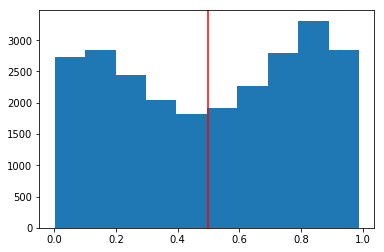

In [13]:
plt.hist(y_pred)
_ = plt.axvline(x = 0.5, color="red")

In [14]:
auc = roc_auc_score(y_test,y_pred)*100.0

In [15]:
auc

77.45529824

In [ ]:
predicted_sentiment = []
for i in y_pred:
    predicted_sentiment.append(i[0])

In [ ]:
df = pd.DataFrame(list(zip(predicted_sentiment,y_test)),columns=["predicted","real"])

In [ ]:
df.head()